## Cosine Similarity Notebook 

#### @Author: Jyontika Kapoor


#### **Steps:**
Step 1: Create the vocabulary of all unique terms (each of them will be a dimension) 

Step 2: Represent each document and the query in the vector space created by these terms

Step 3: Calculate the cosine similarity between the query and each document

Step 4: Rank the results based on the cosine similarity


In [15]:
import numpy as np
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

def create_vocabulary(document_text):
    """
    Step 1: Create the vocabulary of all unique terms (each of them will be a dimension)
    
    @param: document_text is an input  text for vocabulary creation
    """
    document_text = document_text.lower()
    text = "".join(char for char in document_text if char not in string.punctuation)
    words = set(text.split())
    vocabulary = sorted(words)

    return vocabulary


In [5]:
def test_create_vocabulary():
    # Test Case 1: Basic functionality
    text_1 = "This is a simple test."
    result_1 = create_vocabulary(text_1)
    assert result_1 == ['a', 'is', 'simple', 'test', 'this']

    # Test Case 2: Empty input
    text_2 = ""
    result_2 = create_vocabulary(text_2)
    assert result_2 == []

    # Test Case 3: Input with punctuation
    text_3 = "Python is awesome!"
    result_3 = create_vocabulary(text_3)
    assert result_3 == ['awesome', 'is', 'python']

    # Test Case 4: Input with repeated words
    text_4 = "Testing testing one two two"
    result_4 = create_vocabulary(text_4)
    assert result_4 == ['one', 'testing', 'two']

    print("All test cases passed!")

# Run test cases
test_create_vocabulary()


All test cases passed!


In [6]:
##Step 2: Represent each document and the query in the vector space created by these terms

def sentence_to_vector(sentence, vocabulary):
    """Represents each sentence as a vector"""
    sentence_vector = [sentence.lower().split().count(word) for word in vocabulary]
    return sentence_vector


In [7]:
sentences = [
        "This is the first sentence.",
        "The second sentence is here.",
        "And this is the third one.",
    ]


all_text = " ".join(sentences)
vocab = create_vocabulary(all_text)

# convert each sentence to a vector
sentence_vectors = [sentence_to_vector(sentence, vocab) for sentence in sentences]


for i, vector in enumerate(sentence_vectors, 1):
        print(f"Sentence {i} Vector: {vector}")

Sentence 1 Vector: [0, 1, 0, 1, 0, 0, 0, 1, 0, 1]
Sentence 2 Vector: [0, 0, 0, 1, 0, 1, 1, 1, 0, 0]
Sentence 3 Vector: [1, 0, 0, 1, 0, 0, 0, 1, 1, 1]


In [8]:
# Step 3: calculate cosine similarity  between query and each document

def calculate_cosine_similarity(query_vector, document_vector):
    """
    Calculate cosine similarity between a query vector and a document vector.
    """
    #  dot product
    dot_product = sum(i * j for i, j in zip(query_vector, document_vector))

    #  magnitudes
    query_magnitude = sum(i**2 for i in query_vector) ** 0.5
    document_magnitude = sum(i**2 for i in document_vector) ** 0.5

    #  cosine similarity
    if query_magnitude == 0 or document_magnitude == 0:
        return 0  # if 1 or both vectors are 0 vectors
    else:
        similarity = dot_product / (query_magnitude * document_magnitude)
        return similarity



In [9]:
#test
query_vector = [1, 0, 1]
document_vector = [0, 1, 1]

cosine_similarity_value = calculate_cosine_similarity(query_vector, document_vector)
print(f"Cosine Similarity: {cosine_similarity_value}")


Cosine Similarity: 0.4999999999999999


In [10]:
#Step 4: rank documents

def rank_results(query_vector, document_vectors):
    """
    Rank the results based on cosine similarity between the query and each document.
    """
    results = []

    for i, document_vector in enumerate(document_vectors):
        similarity = calculate_cosine_similarity(query_vector, document_vector)
        results.append((i, similarity))

    # Rank results based on cosine similarity
    ranked_results = sorted(results, key=lambda x: x[1], reverse=True)
    return ranked_results


In [11]:
# tests
query_vector = [1, 0, 1]
document_vectors = [[0, 1, 1], [1, 1, 0], [0, 0, 1]]

ranked_results = rank_results(query_vector, document_vectors)

for rank, (doc_index, similarity) in enumerate(ranked_results, 1):
    print(f"Rank {rank}: Document {doc_index + 1} - Cosine Similarity: {similarity}")


Rank 1: Document 3 - Cosine Similarity: 0.7071067811865475
Rank 2: Document 1 - Cosine Similarity: 0.4999999999999999
Rank 3: Document 2 - Cosine Similarity: 0.4999999999999999


## Spring and Summer Sentences

In [12]:
springSentences = [
"As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
"Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
"With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
"The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
"During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun."
]

summerSentences = [
"Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
"The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
"As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
"The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
"Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."
]

In [13]:
# define sentence vectors
spring_sentence_vectors = [sentence_to_vector(sentence, vocab) for sentence in springSentences]

summer_sentence_vectors = [sentence_to_vector(sentence, vocab) for sentence in summerSentences]

# calc. cosine similarity for spring and summer sentences
spring_results = rank_results(query_vector, spring_sentence_vectors)

summer_results = rank_results(query_vector, summer_sentence_vectors)



In [14]:

print("Spring Sentences Ranking:")
for i, similarity in spring_results:
    print(f"Spring Sentence {i+1}: Similarity = {similarity}")

print("\nSummer Sentences Ranking:")
for i, similarity in summer_results:
    print(f"Summer Sentence {i+1}: Similarity = {similarity}")

Spring Sentences Ranking:
Spring Sentence 2: Similarity = 0.4999999999999999
Spring Sentence 5: Similarity = 0.31622776601683794
Spring Sentence 1: Similarity = 0.0
Spring Sentence 3: Similarity = 0.0
Spring Sentence 4: Similarity = 0.0

Summer Sentences Ranking:
Summer Sentence 1: Similarity = 0.6324555320336759
Summer Sentence 4: Similarity = 0.31622776601683794
Summer Sentence 2: Similarity = 0.2886751345948129
Summer Sentence 3: Similarity = 0.0
Summer Sentence 5: Similarity = 0.0


### Use matrix and heatmap 

In [20]:

def cosine_similarity_matrix(sentence_vectors):
    num_sentences = len(sentence_vectors)
    similarity_matrix = np.zeros((num_sentences, num_sentences))
    for i in range(num_sentences):
        for j in range(num_sentences):
            similarity_matrix[i, j] = calculate_cosine_similarity(sentence_vectors[i], sentence_vectors[j])
    return similarity_matrix


In [21]:

all_sentence_vectors = spring_sentence_vectors + summer_sentence_vectors
similarity_matrix = cosine_similarity_matrix(all_sentence_vectors)




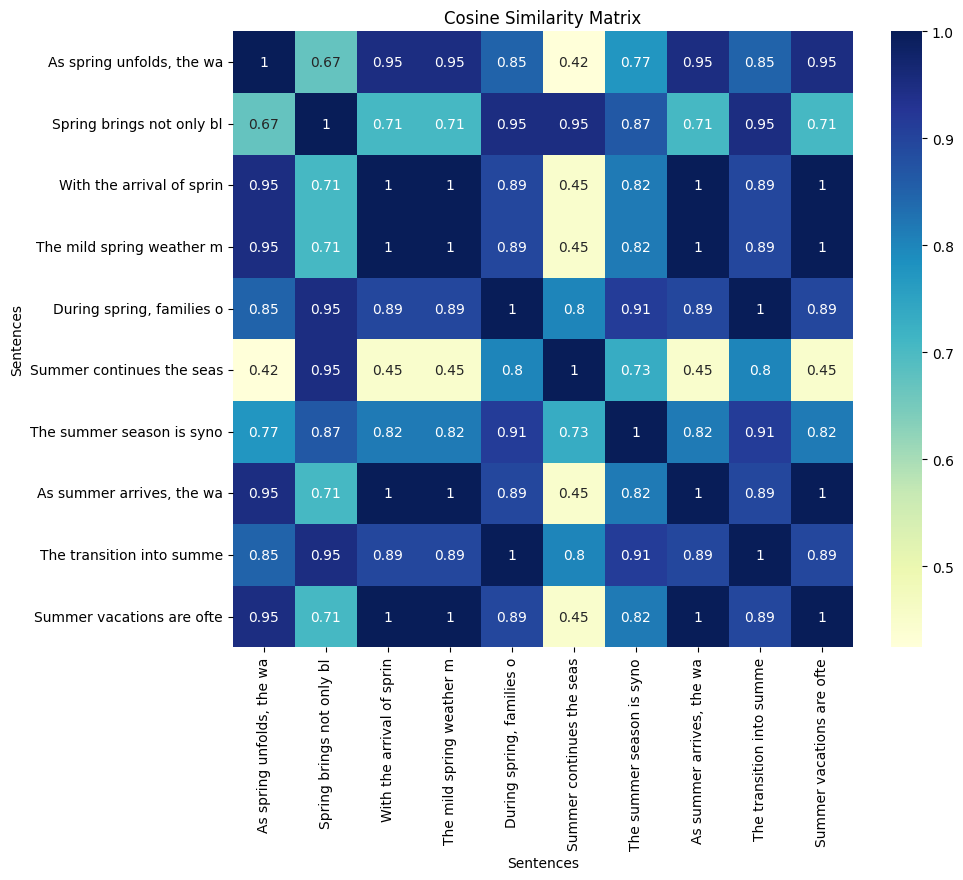

In [22]:
# Shorten sentences for display - from eni code
short_sentences = [sent[:25] for sent in springSentences + summerSentences]

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, xticklabels=short_sentences, yticklabels=short_sentences, cmap="YlGnBu")
plt.title("Cosine Similarity Matrix")
plt.xlabel("Sentences")
plt.ylabel("Sentences")
plt.show()